In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [567]:
# prompt: buatkan format untuk read csv

import pandas as pd
kebakaran_df = pd.read_csv('data-kebakaran-dkijakarta.csv')
kebakaran_df.head()


,_id,tanggal,jenis_kejadian_bencana,keterangan_jkb,sumber_informasi,alamat_kejadian,kelurahan,kecamatan,wilayah,kerugian_jumlah_kk,taksiran_kerugian,periode_data
0,1,2018-02-01T00:00:00,Penyelamatan,Pengendalian Hewan,Masyarakat Datang,Jl. Pisangan Baru II,Pisangan Baru,Matraman,Kota Administrasi Jakarta Timur,0,0,201802
1,2,2018-02-01T00:00:00,Kebakaran,Bencana Kebakaran,Petugas Instansi Lain,Jl. Tol Prumpung/Jagorawi KM. 2/600,Cipinang Besar Utara,Jatinegara,Kota Administrasi Jakarta Timur,0,150000000,201802
2,3,2018-02-01T00:00:00,Penyelamatan,Pengendalian Hewan,Masyarakat Datang,"Stasiun Sudirman, Jl. Kendal",Menteng,Menteng,Kota Administrasi Jakarta Pusat,0,0,201802
3,4,2018-02-01T00:00:00,Penyelamatan,Pohon Tumbang,Masyarakat Datang,Jl. Kramat Jaya,Tugu Utara,Koja,Kota Administrasi Jakarta Utara,0,0,201802
4,5,2018-02-01T00:00:00,Kebakaran,Bencana Kebakaran,Masyarakat Datang,Jl. Pedongkelan Raya,Cengkareng Timur,Cengkareng,Kota Administrasi Jakarta Barat,1,1215000000,201802


In [568]:
# prompt: buatkan syntax untuk hapus column _id

kebakaran_df = kebakaran_df.drop('_id', axis=1)


In [569]:
kebakaran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tanggal                 3891 non-null   object
 1   jenis_kejadian_bencana  3891 non-null   object
 2   keterangan_jkb          3891 non-null   object
 3   sumber_informasi        3891 non-null   object
 4   alamat_kejadian         3891 non-null   object
 5   kelurahan               3891 non-null   object
 6   kecamatan               3891 non-null   object
 7   wilayah                 3891 non-null   object
 8   kerugian_jumlah_kk      3891 non-null   int64 
 9   taksiran_kerugian       3891 non-null   object
 10  periode_data            3891 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 334.5+ KB


In [570]:
kebakaran_df['tanggal'] = pd.to_datetime(kebakaran_df['tanggal'], format='%Y-%m-%dT%H:%M:%S') # Update the format to include time
kebakaran_df['jenis_kejadian_bencana'] = kebakaran_df['jenis_kejadian_bencana'].astype('category')
kebakaran_df['kelurahan'] = kebakaran_df['kelurahan'].astype('category')
kebakaran_df['kecamatan'] = kebakaran_df['kecamatan'].astype('category')
kebakaran_df['wilayah'] = kebakaran_df['wilayah'].astype('category')
# Replace non-numeric values with NaN before converting to integer
kebakaran_df['taksiran_kerugian'] = pd.to_numeric(kebakaran_df['taksiran_kerugian'], errors='coerce')
kebakaran_df['taksiran_kerugian'] = kebakaran_df['taksiran_kerugian'].fillna(0).astype(int) # Fill NaN with 0 and convert to int
kebakaran_df['periode_data'] = pd.to_datetime(kebakaran_df['periode_data'], format='%Y%m')

In [571]:
print(kebakaran_df['kerugian_jumlah_kk'].unique())

[  0   1  32  85  21   3   8  11  17   5  26   2   6  15  40  20   4  18
  30  12  10   9  70  25  60  19  97  36 166 400  24 600]


In [572]:
kebakaran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tanggal                 3891 non-null   datetime64[ns]
 1   jenis_kejadian_bencana  3891 non-null   category      
 2   keterangan_jkb          3891 non-null   object        
 3   sumber_informasi        3891 non-null   object        
 4   alamat_kejadian         3891 non-null   object        
 5   kelurahan               3891 non-null   category      
 6   kecamatan               3891 non-null   category      
 7   wilayah                 3891 non-null   category      
 8   kerugian_jumlah_kk      3891 non-null   int64         
 9   taksiran_kerugian       3891 non-null   int64         
 10  periode_data            3891 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](2), int64(2), object(3)
memory usage: 254.2+ KB


In [573]:
kebakaran_df.isna().sum()

,0
tanggal,0
jenis_kejadian_bencana,0
keterangan_jkb,0
sumber_informasi,0
alamat_kejadian,0
kelurahan,0
kecamatan,0
wilayah,0
kerugian_jumlah_kk,0
taksiran_kerugian,0


In [574]:
print("Jumlah duplikasi: ",kebakaran_df.duplicated().sum())
kebakaran_df.describe()

Jumlah duplikasi:  258


,tanggal,kerugian_jumlah_kk,taksiran_kerugian,periode_data
count,3891,3891.000000,3.891000e+03,3891
mean,2018-06-30 22:35:15.034695424,0.873040,6.412658e+07,2018-06-15 23:47:25.026985472
min,2018-01-01 00:00:00,0.000000,0.000000e+00,2018-01-01 00:00:00
25%,2018-03-17 00:00:00,0.000000,0.000000e+00,2018-03-01 00:00:00
50%,2018-07-08 00:00:00,0.000000,0.000000e+00,2018-07-01 00:00:00
75%,2018-10-13 00:00:00,0.000000,3.000000e+05,2018-10-01 00:00:00
max,2018-12-31 00:00:00,600.000000,3.000000e+10,2018-12-01 00:00:00
std,NaN,15.645028,5.967070e+08,NaN


In [575]:
kebakaran_df.drop_duplicates(inplace=True)

In [576]:
print("Jumlah duplikasi: ",kebakaran_df.duplicated().sum())
kebakaran_df.describe()

Jumlah duplikasi:  0


,tanggal,kerugian_jumlah_kk,taksiran_kerugian,periode_data
count,3633,3633.000000,3.633000e+03,3633
mean,2018-07-12 07:37:48.208092416,0.748417,6.319675e+07,2018-06-27 08:18:13.971924224
min,2018-01-01 00:00:00,0.000000,0.000000e+00,2018-01-01 00:00:00
25%,2018-04-07 00:00:00,0.000000,0.000000e+00,2018-04-01 00:00:00
50%,2018-07-21 00:00:00,0.000000,0.000000e+00,2018-07-01 00:00:00
75%,2018-10-17 00:00:00,0.000000,2.500000e+05,2018-10-01 00:00:00
max,2018-12-31 00:00:00,600.000000,3.000000e+10,2018-12-01 00:00:00
std,NaN,12.768763,6.094281e+08,NaN


In [577]:
kebakaran_df.kerugian_jumlah_kk.value_counts()

,count
kerugian_jumlah_kk,
0,3302
1,200
2,29
3,27
6,14
5,9
10,8
4,6
8,4


In [578]:
# Pastikan kolom 'kerugian_jumlah_kk' adalah numerik
kebakaran_df['kerugian_jumlah_kk'] = pd.to_numeric(kebakaran_df['kerugian_jumlah_kk'], errors='coerce')

# Tampilkan nilai unik untuk verifikasi
print(kebakaran_df['kerugian_jumlah_kk'].unique())

[  0   1  32  85  21   3   8  11  17   5  26   2   6  15  40  20   4  18
  30  12  10   9  70  25  60  19  97  36 166 400  24 600]


In [579]:
# Contoh: Menghapus outlier berdasarkan persentil
q_low = kebakaran_df['kerugian_jumlah_kk'].quantile(0.01)  # 1st percentile
q_hi = kebakaran_df['kerugian_jumlah_kk'].quantile(0.99)   # 99th percentile

# Filter out outlier
df_filtered = kebakaran_df[(kebakaran_df['kerugian_jumlah_kk'] > q_low) & (kebakaran_df['kerugian_jumlah_kk'] < q_hi)]


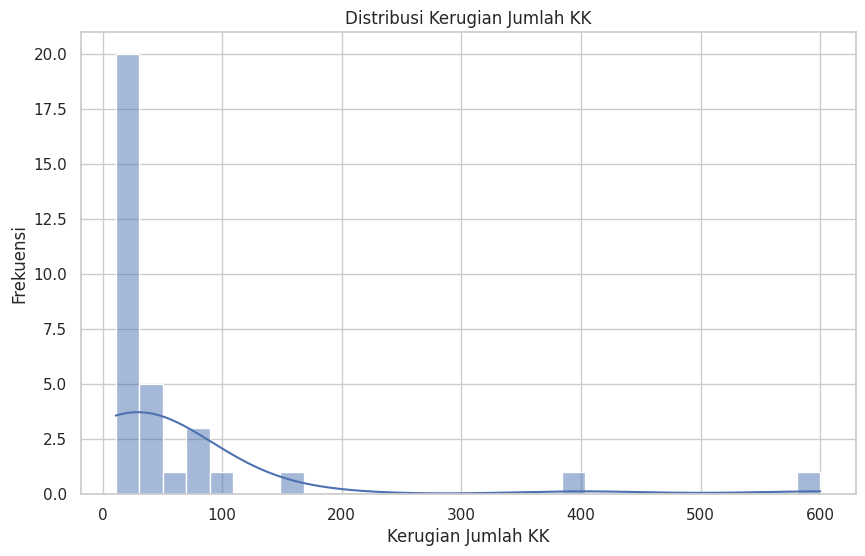

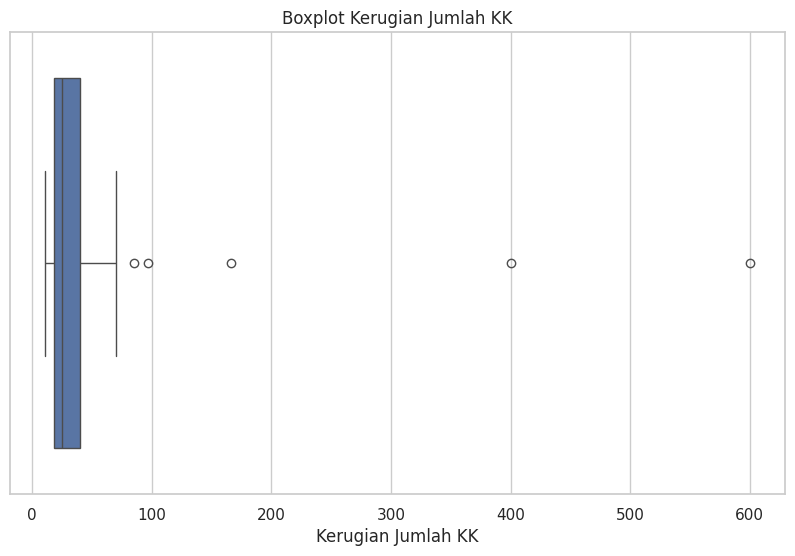

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to filter your DataFrame in some way,
# create a new DataFrame called 'df_filtered'
# Replace the condition below with your actual filtering logic
df_filtered = kebakaran_df[kebakaran_df['kerugian_jumlah_kk'] > 10]

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['kerugian_jumlah_kk'], kde=True, bins=30)  # Use df_filtered here
plt.title('Distribusi Kerugian Jumlah KK')
plt.xlabel('Kerugian Jumlah KK')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['kerugian_jumlah_kk'])  # Use df_filtered here
plt.title('Boxplot Kerugian Jumlah KK')
plt.xlabel('Kerugian Jumlah KK')
plt.show()

In [581]:
df_filtered[['kerugian_jumlah_kk', 'taksiran_kerugian']].describe()

,kerugian_jumlah_kk,taksiran_kerugian
count,33.000000,3.300000e+01
mean,63.818182,1.031818e+09
std,119.540645,1.100289e+09
min,11.000000,0.000000e+00
25%,18.000000,3.750000e+08
50%,25.000000,8.000000e+08
75%,40.000000,1.500000e+09
max,600.000000,5.000000e+09


In [582]:
print("Jumlah duplikasi: ",kebakaran_df.duplicated().sum())
kebakaran_df.describe()

Jumlah duplikasi:  0


,tanggal,kerugian_jumlah_kk,taksiran_kerugian,periode_data
count,3633,3633.000000,3.633000e+03,3633
mean,2018-07-12 07:37:48.208092416,0.748417,6.319675e+07,2018-06-27 08:18:13.971924224
min,2018-01-01 00:00:00,0.000000,0.000000e+00,2018-01-01 00:00:00
25%,2018-04-07 00:00:00,0.000000,0.000000e+00,2018-04-01 00:00:00
50%,2018-07-21 00:00:00,0.000000,0.000000e+00,2018-07-01 00:00:00
75%,2018-10-17 00:00:00,0.000000,2.500000e+05,2018-10-01 00:00:00
max,2018-12-31 00:00:00,600.000000,3.000000e+10,2018-12-01 00:00:00
std,NaN,12.768763,6.094281e+08,NaN


In [583]:
kebakaran_df.describe(include="all")

,tanggal,jenis_kejadian_bencana,keterangan_jkb,sumber_informasi,alamat_kejadian,kelurahan,kecamatan,wilayah,kerugian_jumlah_kk,taksiran_kerugian,periode_data
count,3633,3633,3633,3633,3633,3633,3633,3633,3633.000000,3.633000e+03,3633
unique,NaN,3,12,6,3227,401,52,11,NaN,NaN,NaN
top,NaN,Kebakaran,Bencana Kebakaran,Masyarakat Datang,Jl. Benyamin Sueb,Gelora,Tanah Abang,Kota Administrasi Jakarta Pusat,NaN,NaN,NaN
freq,NaN,1614,1614,1280,11,159,253,859,NaN,NaN,NaN
mean,2018-07-12 07:37:48.208092416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748417,6.319675e+07,2018-06-27 08:18:13.971924224
min,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,2018-01-01 00:00:00
25%,2018-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,2018-04-01 00:00:00
50%,2018-07-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,2018-07-01 00:00:00
75%,2018-10-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.500000e+05,2018-10-01 00:00:00
max,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000,3.000000e+10,2018-12-01 00:00:00


In [584]:
# Mengelompokkan data berdasarkan 'kelurahan'
df = kebakaran_df.groupby(by="kelurahan").agg({
    "kerugian_jumlah_kk": ["max", "min", "mean", "std"],
    "taksiran_kerugian": ["max", "min", "mean", "std"]
})

df.head(10)

# Menampilkan daerah dengan kerugian tertinggi berdasarkan metrik yang berbeda
print("Daerah dengan kerugian jumlah KK maksimum:")
print(df["kerugian_jumlah_kk"]["max"].sort_values(ascending=False).head())

print("\nDaerah dengan kerugian jumlah KK minimum (excluding 0):")
print(df[df["kerugian_jumlah_kk"]["min"] > 0]["kerugian_jumlah_kk"]["min"].sort_values().head())

print("\nDaerah dengan taksiran kerugian maksimum:")
print(df["taksiran_kerugian"]["max"].sort_values(ascending=False).head())

print("\nDaerah dengan taksiran kerugian minimum (excluding 0):")
print(df[df["taksiran_kerugian"]["min"] > 0]["taksiran_kerugian"]["min"].sort_values().head())


Daerah dengan kerugian jumlah KK maksimum:
kelurahan
Krukut             600
Kembangan Utara    400
Jembatan Besi      166
Tanah tinggi        97
Pejaten Timur       85
Name: max, dtype: int64

Daerah dengan kerugian jumlah KK minimum (excluding 0):
kelurahan
Cipinang besar selatan    1
Kelapa dua                1
Pademangan barat          1
Rawa Badak Utara          1
Rawa badak selatan        1
Name: min, dtype: int64

Daerah dengan taksiran kerugian maksimum:
kelurahan
Kapuk Muara        30000000000
Tegal Alur         12000000000
Ancol               9000000000
Kembangan Utara     5000000000
Tangerang           5000000000
Name: max, dtype: int64

Daerah dengan taksiran kerugian minimum (excluding 0):
kelurahan
rawamangun                 50000
Rawa Badak Utara           50000
Tamansari                1000000
kampung mester/melayu    1000000
Jelambar Baru            1000000
Name: min, dtype: int64


<ipython-input-584-c6e93d585239>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = kebakaran_df.groupby(by="kelurahan").agg({


In [585]:
# Convert the 'tanggal' column to string type before using .str accessor
kebakaran_df['tanggal'] = kebakaran_df['tanggal'].astype(str)

# Filter data for January 2018
kebakaran_januari_2018 = kebakaran_df[kebakaran_df['tanggal'].str.startswith('2018-02')]

# Mengelompokkan data berdasarkan 'bulan' dan 'kecamatan', serta menghitung frekuensi kejadian bencana
grouped = kebakaran_januari_2018.groupby(by=['kecamatan']).size().reset_index(name='count')

# Menentukan kecamatan dengan frekuensi kejadian bencana tertinggi di Januari 2018
most_common_kecamatan = grouped.loc[grouped['count'].idxmax()]

# Menampilkan hasil
print("Kecamatan dengan kejadian bencana terbanyak di Januari 2018 adalah:")
print(most_common_kecamatan)

Kecamatan dengan kejadian bencana terbanyak di Januari 2018 adalah:
kecamatan    Kramat Jati
count                 25
Name: 28, dtype: object


<ipython-input-585-45c8b364606b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = kebakaran_januari_2018.groupby(by=['kecamatan']).size().reset_index(name='count')


In [586]:
# Jumlah kejadian kebakaran berdasarkan lokasi
kejadian_per_lokasi = kebakaran_df[['kecamatan', 'tanggal']].value_counts()
print(kejadian_per_lokasi)


kecamatan       tanggal   
Tanah Abang     2018-08-29    10
                2018-08-23    10
                2018-08-26     9
                2018-10-13     8
                2018-08-20     8
                              ..
Kebayoran Baru  2018-03-20     1
                2018-03-26     1
                2018-03-27     1
                2018-04-07     1
pondok Aren     2018-12-31     1
Name: count, Length: 2984, dtype: int64


In [587]:
jenis_bencana_counts = kebakaran_df[['jenis_kejadian_bencana', 'tanggal']].value_counts()
print(jenis_bencana_counts)

jenis_kejadian_bencana  tanggal   
Bantuan Operasi         2018-12-31    36
                        2018-08-26    22
                        2018-08-23    21
                        2018-08-29    19
Penyelamatan            2018-12-13    18
                                      ..
                        2018-06-09     1
                        2018-06-10     1
                        2018-06-11     1
                        2018-06-12     1
Bantuan Operasi         2018-01-10     1
Name: count, Length: 868, dtype: int64


In [588]:
# Rata-rata kerugian dan jumlah korban
rata_kerugian = df['kerugian_jumlah_kk'].mean()
rata_korban = df['taksiran_kerugian'].mean()

print(f"Rata-rata kerugian per KK: {rata_kerugian}")
print(f"Rata-rata taksiran kerugian: {rata_korban}")


Rata-rata kerugian per KK: max     6.104738
min     0.017456
mean    0.866160
std     2.530134
dtype: float64
Rata-rata taksiran kerugian: max     4.585930e+08
min     3.080985e+06
mean    6.136003e+07
std     1.734073e+08
dtype: float64


<ipython-input-589-f3a53d9df699>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, palette='viridis')


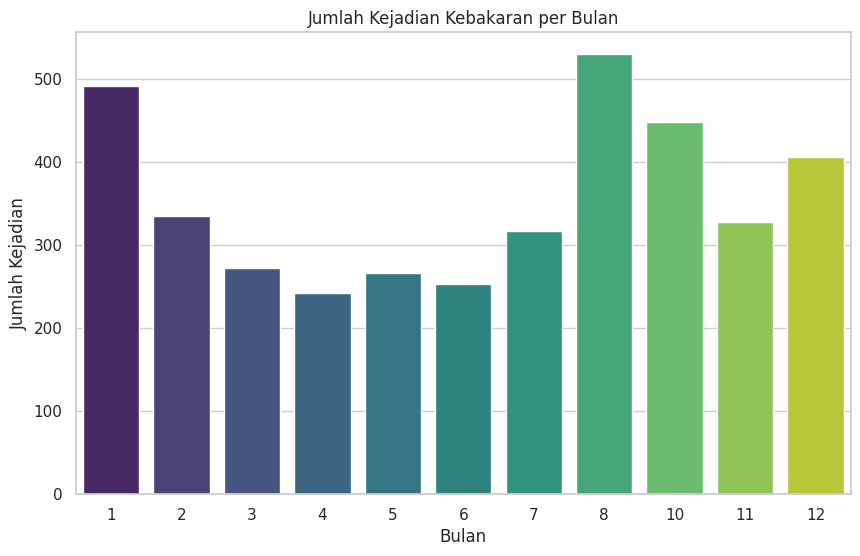

<ipython-input-589-f3a53d9df699>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kejadian_per_kecamatan.index, y=kejadian_per_kecamatan.values, palette='viridis')


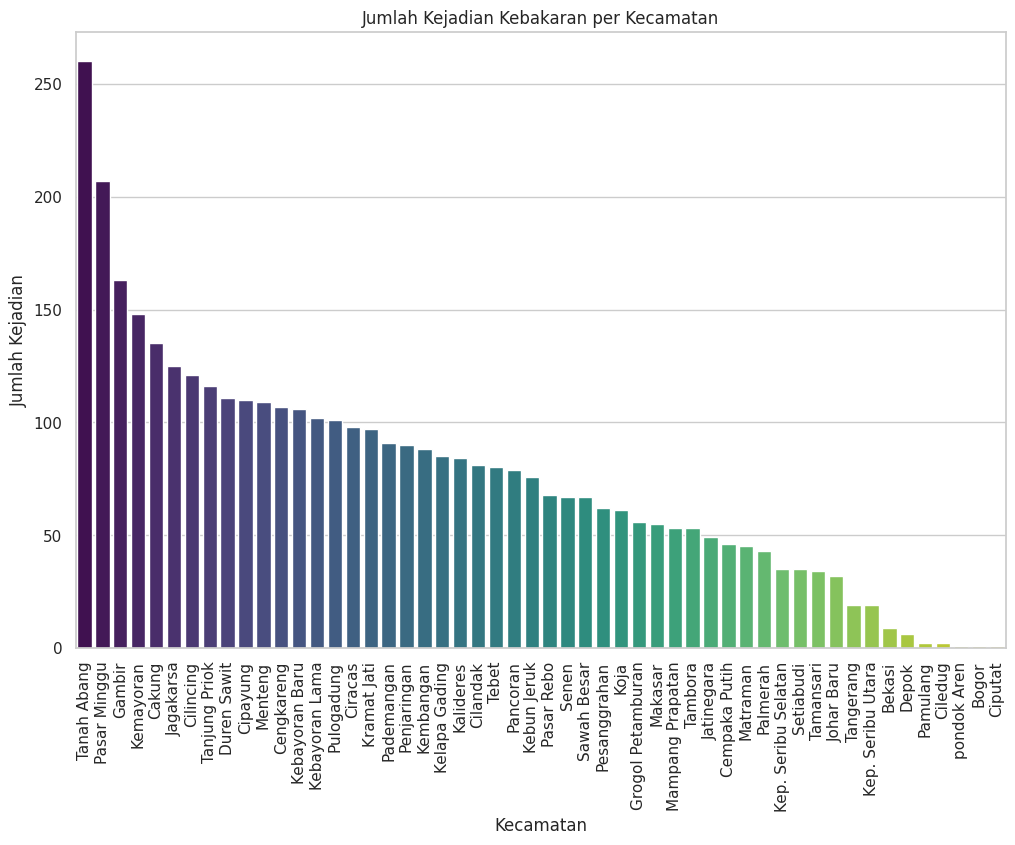

In [589]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your data into a DataFrame
# df = pd.read_csv('data-kebakaran-dkijakarta.csv')  # Replace 'data_kebakaran.csv' with your actual file name

# # Convert 'tanggal' column to datetime objects
# df['tanggal'] = pd.to_datetime(df['tanggal'])  # This line is crucial

# # Now you can proceed with the rest of your code:
# # Menambahkan kolom bulan
# df['bulan'] = df['tanggal'].dt.month

# # Menghitung jumlah kejadian per bulan
# kejadian_per_bulan = df['bulan'].value_counts().sort_index()

# # Visualisasi
# plt.figure(figsize=(10, 6))
# sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, palette='viridis')
# plt.xlabel('Bulan')
# plt.ylabel('Jumlah Kejadian')
# plt.title('Jumlah Kejadian Kebakaran per Bulan')
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame
df = pd.read_csv('data-kebakaran-dkijakarta.csv')  # Ganti dengan nama file yang sesuai

# Convert 'tanggal' column to datetime objects
df['tanggal'] = pd.to_datetime(df['tanggal'])  # Penting

# Menambahkan kolom bulan
df['bulan'] = df['tanggal'].dt.month

# Menghitung jumlah kejadian per bulan
kejadian_per_bulan = df['bulan'].value_counts().sort_index()

# Visualisasi jumlah kejadian per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x=kejadian_per_bulan.index, y=kejadian_per_bulan.values, palette='viridis')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Kebakaran per Bulan')
plt.show()

# Menghitung jumlah kejadian per kecamatan
kejadian_per_kecamatan = df['kecamatan'].value_counts()

# Visualisasi jumlah kejadian per kecamatan
plt.figure(figsize=(12, 8))
sns.barplot(x=kejadian_per_kecamatan.index, y=kejadian_per_kecamatan.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels to fit
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Kebakaran per Kecamatan')
plt.show()


<ipython-input-590-93f5877e74e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kejadian_per_wilayah.index, y=kejadian_per_wilayah.values, palette='viridis')


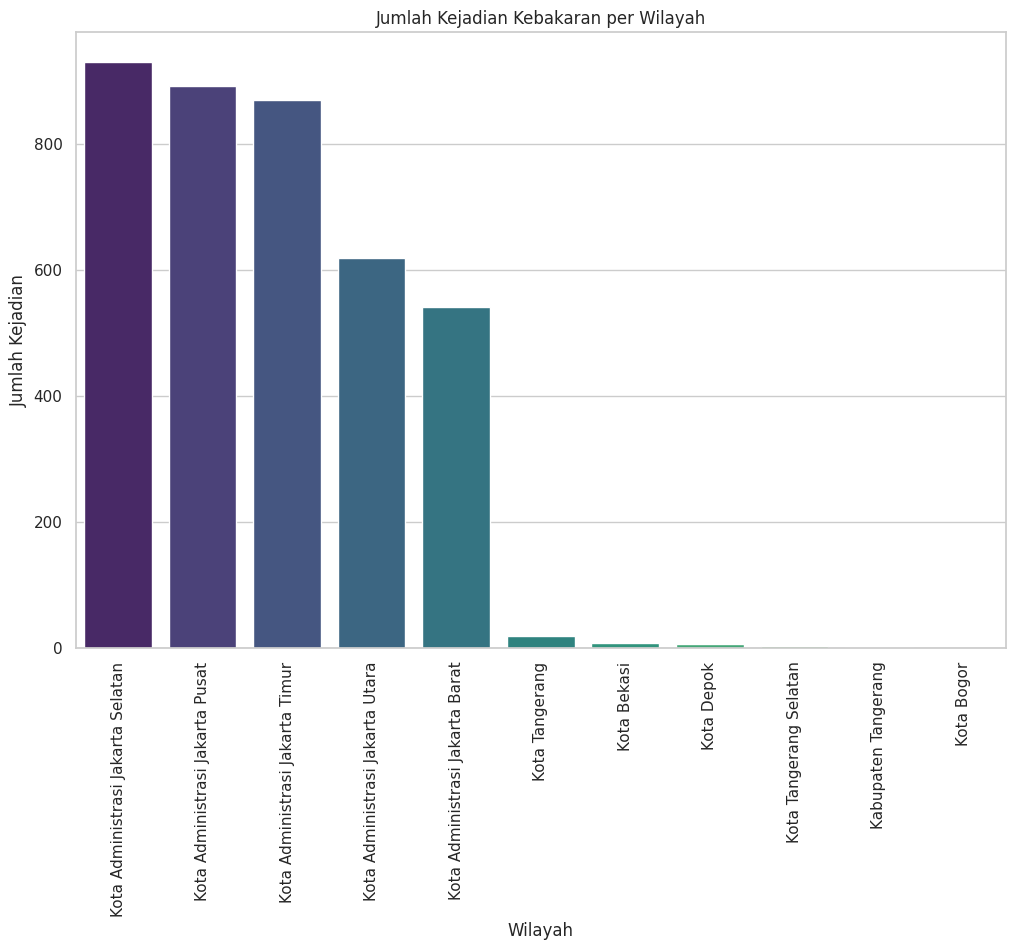

In [590]:
# Menghitung jumlah kejadian per wilayah
kejadian_per_wilayah = df['wilayah'].value_counts()

# Visualisasi jumlah kejadian per wilayah
plt.figure(figsize=(12, 8))
sns.barplot(x=kejadian_per_wilayah.index, y=kejadian_per_wilayah.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels to fit
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Kebakaran per Wilayah')
plt.show()


<ipython-input-591-d4b1804df49f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_kelurahan.index, y=top_10_kelurahan.values, palette='viridis')


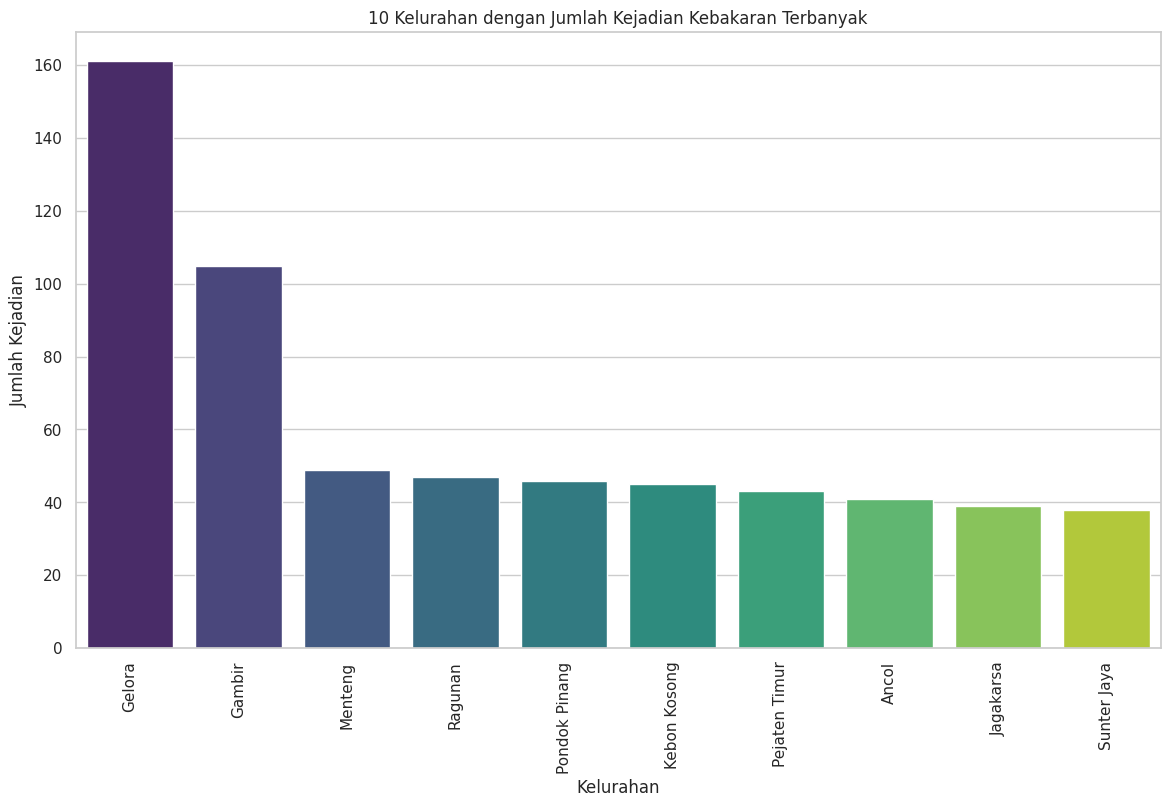

In [591]:
# Menghitung jumlah kejadian per kelurahan
kejadian_per_kelurahan = df['kelurahan'].value_counts()

# Ambil 10 kelurahan dengan jumlah kejadian terbanyak
top_10_kelurahan = kejadian_per_kelurahan.head(10)

# Visualisasi jumlah kejadian per kelurahan (10 teratas)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_kelurahan.index, y=top_10_kelurahan.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate x labels to fit
plt.xlabel('Kelurahan')
plt.ylabel('Jumlah Kejadian')
plt.title('10 Kelurahan dengan Jumlah Kejadian Kebakaran Terbanyak')
plt.show()


jenis_kejadian_bencana
Kebakaran          1734
Penyelamatan       1244
Bantuan Operasi     913
Name: count, dtype: int64


<ipython-input-592-f86e3c4a7980>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=penyebab_terbanyak.index, y=penyebab_terbanyak.values, palette='magma')


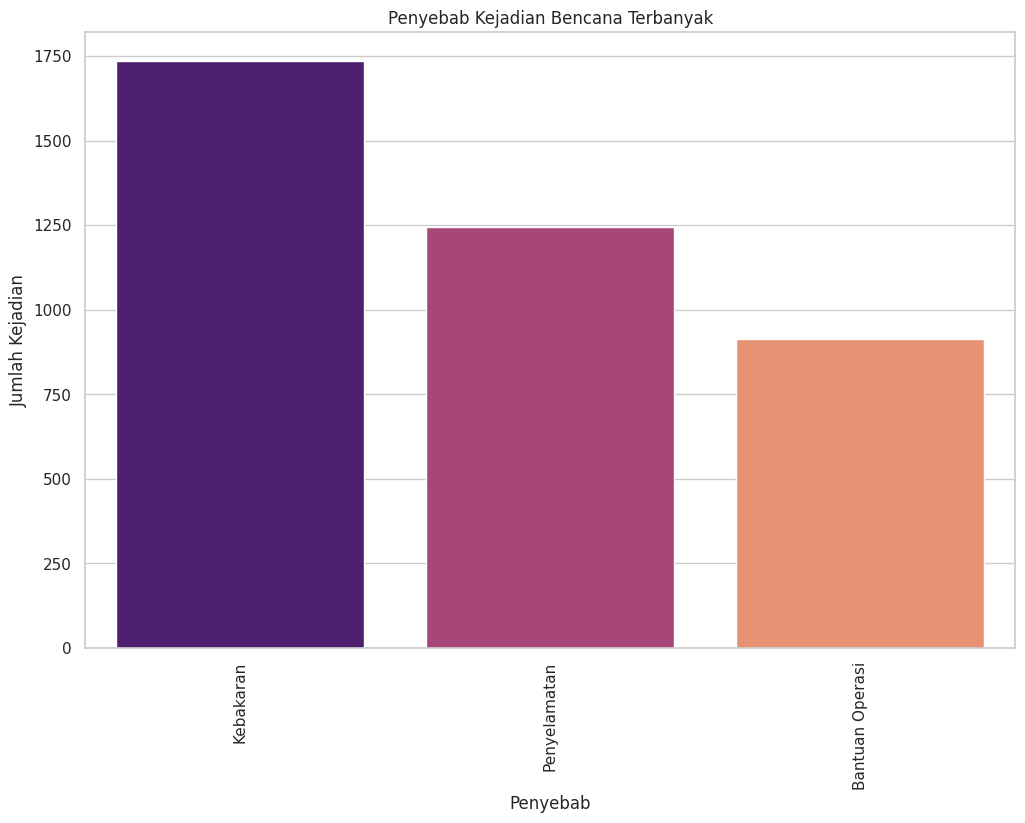

In [592]:
# Jumlah kejadian berdasarkan penyebab
penyebab_terbanyak = df['jenis_kejadian_bencana'].value_counts()
print(penyebab_terbanyak)

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x=penyebab_terbanyak.index, y=penyebab_terbanyak.values, palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Penyebab')
plt.ylabel('Jumlah Kejadian')
plt.title('Penyebab Kejadian Bencana Terbanyak')
plt.show()


Koefisien Korelasi antara Kerugian dan Jumlah Korban: 0.20629701160808314


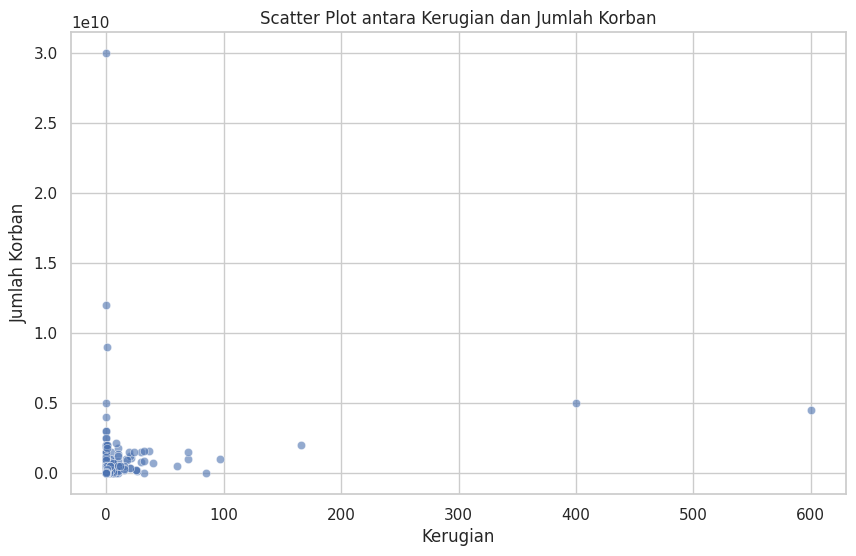

In [593]:
# Menghitung korelasi
korelasi = kebakaran_df[['kerugian_jumlah_kk', 'taksiran_kerugian']].corr().iloc[0, 1]
print(f"Koefisien Korelasi antara Kerugian dan Jumlah Korban: {korelasi}")

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kerugian_jumlah_kk', y='taksiran_kerugian', data=kebakaran_df, alpha=0.6)
plt.xlabel('Kerugian')
plt.ylabel('Jumlah Korban')
plt.title('Scatter Plot antara Kerugian dan Jumlah Korban')
plt.show()


In [595]:
kebakaran_df.to_csv("ready_kebakaran-jakarta2018.csv", index=False)